# AULA #020 - Como fazer um teste paramétrico no Python

https://www.youtube.com/watch?v=jS_mzUK0rjo&t=2756s&ab_channel=ASN.Rocks

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [33]:
# criando um array com uma distribuiçao normal com 1000 amostras
#distribuiçao Z
mu = 0
sigma = 1 
x = np.random.normal(size=1000)

/home/residencial/anaconda3/envs/mybase/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


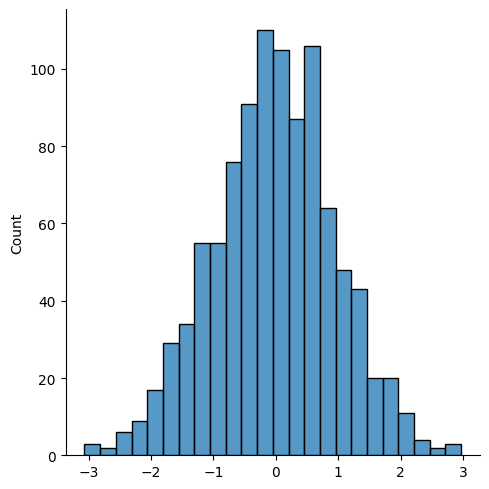

In [34]:
sns.displot(x)

In [38]:
# Teste de normalidade Kolmogorov-Smimov para verificar se segue uma distribuiçao normal
# Qnd nao informado o teste de sinificancia eh de 0.05
stats.kstest(x, 'norm')

KstestResult(statistic=0.026987365178634204, pvalue=0.4522952337362244, statistic_location=0.7454913633108041, statistic_sign=1)

In [5]:
# Teste de normalidade Shapiro-Wilk para verificar se segue uma distribuiçao normal
# Qnd nao informado o teste de significancia eh de 0.05
stats.shapiro(x)

ShapiroResult(statistic=0.9985212087631226, pvalue=0.568554162979126)

In [6]:
w = np.random.uniform(size=2300)

<Axes: ylabel='Count'>

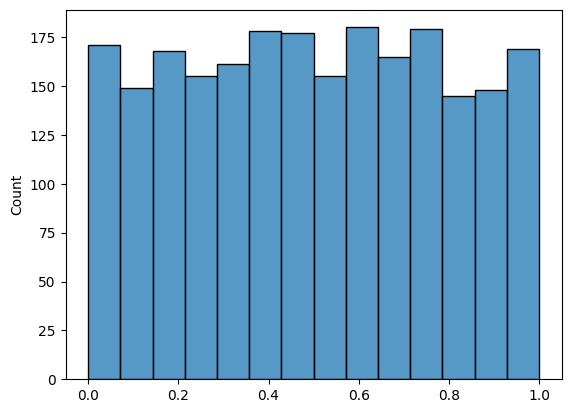

In [7]:
sns.histplot(w)

In [8]:
stats.kstest(w, 'norm').pvalue

0.0

In [10]:
df = pd.read_excel('vacas.xlsx')
df.head()

,peso,faixa
0,516.268190,jovem
1,540.235001,jovem
2,484.336066,jovem
3,498.419383,jovem
4,460.626614,jovem


In [11]:
# Valor médio de peso em relação as vacas jovens e adultas
df.groupby('faixa')['peso'].mean()

faixa
adulto    599.213382
jovem     501.605045
Name: peso, dtype: float64

In [12]:
# verificar a normalidade da distribuicao de vacas jovens
stats.shapiro(df.loc[df['faixa']=='jovem', 'peso'])

ShapiroResult(statistic=0.9956230521202087, pvalue=0.5144494771957397)

<Axes: xlabel='peso', ylabel='Count'>

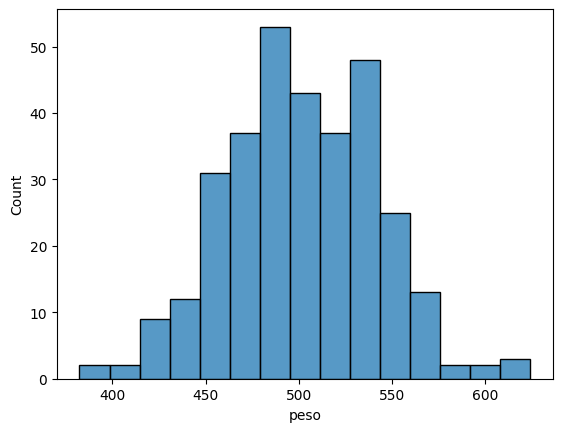

In [13]:
sns.histplot(df.loc[df['faixa']=='jovem', 'peso'])

In [14]:
stats.shapiro(df.loc[df['faixa']=='adulto', 'peso'])

ShapiroResult(statistic=0.9965781569480896, pvalue=0.7309772968292236)

<Axes: xlabel='peso', ylabel='Count'>

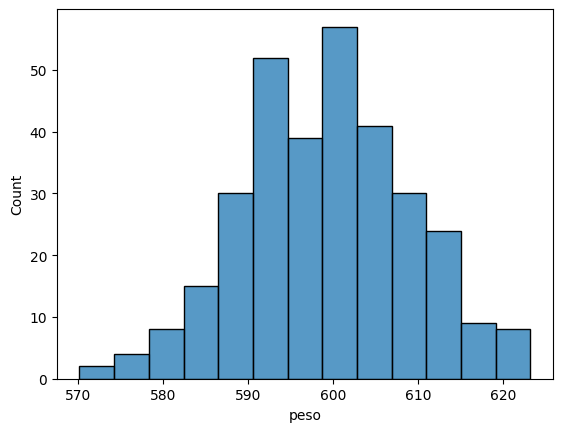

In [15]:
sns.histplot(df.loc[df['faixa']=='adulto', 'peso'])

In [16]:
# Apos o teste de normalidade, verificamos o teste de homogenidade de variancias

stats.levene(df.loc[df['faixa']=='jovem', 'peso'], df.loc[df['faixa']=='adulto', 'peso'])

LeveneResult(statistic=326.9284680108818, pvalue=2.8168225495838855e-59)

<Axes: xlabel='faixa', ylabel='peso'>

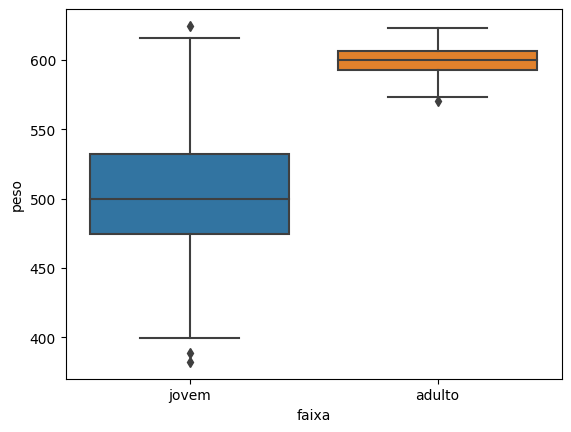

In [17]:
sns.boxplot(data=df, x='faixa', y='peso')

In [18]:
df.describe(include='all')

,peso,faixa
count,638.000000,638
unique,NaN,2
top,NaN,jovem
freq,NaN,319
mean,550.409214,NaN
std,56.895092,NaN
min,382.318845,NaN
25%,499.772508,NaN
50%,578.763193,NaN
75%,599.936030,NaN


In [19]:
# Executando os mesmos testes de normalidade e homogenidade para verificar se a distribuiçao segue uma normal e se 
# as variancias sao iguais

df2 = pd.read_excel('variancia2.xlsx')
df2.head()

,x,grupo
0,8.348935,grupo_A
1,10.055573,grupo_A
2,10.830788,grupo_A
3,10.045451,grupo_A
4,9.125831,grupo_A


In [20]:
df2.groupby('grupo')['x'].mean()

grupo
grupo_A     9.973066
grupo_B    15.059856
Name: x, dtype: float64

In [21]:
# verificando a normalidade por grupo
df2.shape

(2000, 2)

In [22]:
stats.shapiro(df2.loc[df2['grupo']=='grupo_A', 'x'])

ShapiroResult(statistic=0.9983043074607849, pvalue=0.4339529871940613)

In [23]:
stats.shapiro(df2.loc[df2['grupo']=='grupo_B', 'x'])

ShapiroResult(statistic=0.9983258843421936, pvalue=0.4464864134788513)

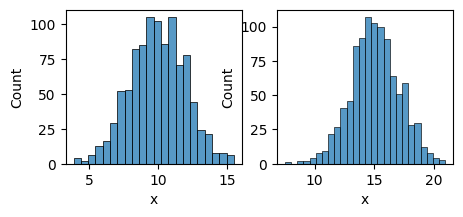

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2))
sns.histplot(df2.loc[df2['grupo']=='grupo_A', 'x'], ax=ax1)
sns.histplot(df2.loc[df2['grupo']=='grupo_B', 'x'], ax=ax2)
plt.show()

In [25]:
stats.levene(df2.loc[df2['grupo']=='grupo_A', 'x'], df2.loc[df2['grupo']=='grupo_B', 'x'])

LeveneResult(statistic=0.051060493471059266, pvalue=0.8212512169511003)

<Axes: xlabel='grupo', ylabel='x'>

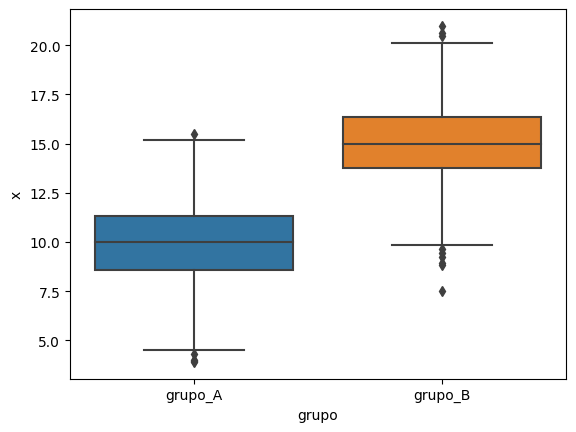

In [26]:
sns.boxplot(data=df2, x='grupo', y='x')

In [27]:
# Teste T para uma amostra
# h0 : mu = mu_0
# h1 : mu <> mu_0

x = np.random.normal(18, 4, 1000)

print(stats.ttest_1samp(x, 10))
print(stats.ttest_1samp(x, 10, alternative='less'))
print(stats.ttest_1samp(x, 10, alternative='greater'))

TtestResult(statistic=62.23415298161043, pvalue=0.0, df=999)
TtestResult(statistic=62.23415298161043, pvalue=1.0, df=999)
TtestResult(statistic=62.23415298161043, pvalue=0.0, df=999)


In [28]:
print(stats.ttest_1samp(df2.loc[df2['grupo']=='grupo_A', 'x'], 10))
print(stats.ttest_1samp(df2.loc[df2['grupo']=='grupo_A', 'x'], 10, alternative='less'))

TtestResult(statistic=-0.42950592818752337, pvalue=0.6676476970661382, df=999)
TtestResult(statistic=-0.42950592818752337, pvalue=0.3338238485330691, df=999)


In [29]:
df2.loc[df2['grupo']=='grupo_A', 'x'].mean()

9.973065796728896

In [30]:
stats.ttest_ind(df2.loc[df2['grupo']=='grupo_A', 'x'], df2.loc[df2['grupo']=='grupo_B', 'x'], alternative='less')

TtestResult(statistic=-56.72683748721628, pvalue=0.0, df=1998.0)

In [31]:
stats.ttest_ind(df.loc[df['faixa']=='jovem', 'peso'], df.loc[df['faixa']=='adulto', 'peso'], alternative='less')

TtestResult(statistic=-42.212645485695305, pvalue=6.770062954903353e-187, df=636.0)